<a href="https://colab.research.google.com/github/sanya128/Multimodal-Emotion-Recognition/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")
import os
os.chdir("/content/gdrive/My Drive/MultimodalEmotion/MODULE3")
!ls

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
extracted_text.txt  LSTM_new.ipynb	  SentimentAnalyser_old.h5  text_emotion.npy
LSTM_model.ipynb    SentimentAnalyser.h5  text_emotion.csv


In [ ]:
#%cd drive/MyDrive/"Colab Notebooks"
#!ls

<h1>Importing <b>NLTK Library</b> </h1>

In [ ]:
import nltk
#nltk.download()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

<h2>Importing Necessary Libraries</h2>

In [ ]:
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D

In [ ]:
#loading text emotion dataset
data = pd.read_csv('text_emotion.csv')

print(data.shape)

#removing unwanted instances in dataset
data.drop(data.index[(data["Emotion"] == "guit")],axis=0,inplace=True)

(7516, 2)


In [ ]:
data = data.sample(frac=1, random_state=1).reset_index()
data.head()

,index,Emotion,Text
0,5695,joy,After being depressed because of a very bad re...
1,946,fear,"In Sweden, a friend and I lived in an appartme..."
2,5135,disgust,One evening when a boy who was drunk made a pa...
3,984,disgust,"A series about Freud was shown on TV. In it, ..."
4,802,fear,"The house was on fire, and I was saved by the ..."


<h1>Preprocessing, Stemming And Lemming</h1>

In [ ]:
x = []
stop_words=set(stopwords.words("english"))
ps = PorterStemmer()
lem = WordNetLemmatizer()

for ent in data['Emotion']:

    # Word Tokenization
    tokenized_text=word_tokenize(ent)

    # StopWord Removal
    filtered_sent=[]
    for w in tokenized_text:
        if w not in stop_words:
            filtered_sent.append(w)

    # Stemming And Lemming
    stemmed_words=[]
    lemmed_words=[]
    for u in filtered_sent:
        stemmed_words.append(ps.stem(u))
        lemmed_words.append(lem.lemmatize(u))


    # filtering all the punctuations
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [v.translate(table) for v in lemmed_words]
    words = [word for word in stripped if word.isalpha()]

    clean_text = ''
    for z in words:
        clean_text += ' ' + z

    x.append(clean_text)

In [ ]:
data['clean_tweet'] = x
data['tweet_len'] = data['clean_tweet'].apply(len)
data.head()

,index,Emotion,Text,clean_tweet,tweet_len
0,5695,joy,After being depressed because of a very bad re...,joy,4
1,946,fear,"In Sweden, a friend and I lived in an appartme...",fear,5
2,5135,disgust,One evening when a boy who was drunk made a pa...,disgust,8
3,984,disgust,"A series about Freud was shown on TV. In it, ...",disgust,8
4,802,fear,"The house was on fire, and I was saved by the ...",fear,5


<Axes: xlabel='Emotion'>

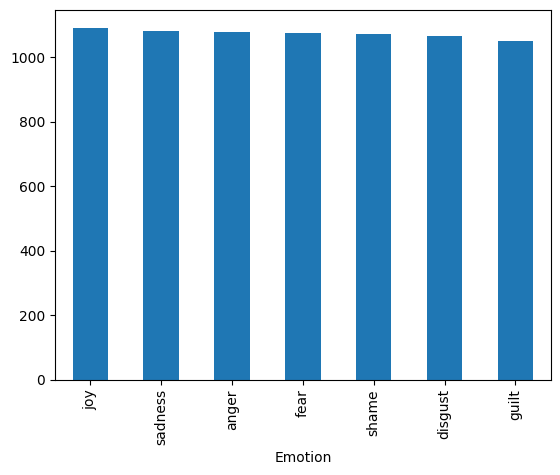

In [ ]:
data['Emotion'].value_counts().plot(kind='bar', stacked=False)

In [ ]:
data['clean_tweet'].values

array([' joy', ' fear', ' disgust', ..., ' shame', ' disgust', ' shame'],
      dtype=object)

In [ ]:
max_words = 2000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(data['clean_tweet'].values)
X = tokenizer.texts_to_sequences(data['clean_tweet'].values)
X = pad_sequences(X, maxlen=32)

<h3>Test, Train Split</h3>

In [ ]:
dummies = pd.get_dummies(data['Emotion'])
Y = dummies.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6012, 32) (6012, 7)
(1503, 32) (1503, 7)


In [ ]:
Y[-15:-1]

array([[ True, False, False, False, False, False, False],
       [False, False, False, False, False,  True, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False],
       [False, False, False, False,  True, False, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False,  True],
       [False,  True, False, False, False, False, False]])

In [ ]:
dict_emotion = {}
dict_label = {}
for i in range(len(Y)):
    dict_emotion[data['Emotion'][i]] = np.argmax(Y[i])
    dict_label[np.argmax(Y[i])] = data['Emotion'][i]
    if len(dict_emotion) == 13:
        print('Break at: ', i)
        break

print(dict_emotion, dict_label)

{'joy': 4, 'fear': 2, 'disgust': 1, 'shame': 6, 'anger': 0, 'sadness': 5, 'guilt': 3} {4: 'joy', 2: 'fear', 1: 'disgust', 6: 'shame', 0: 'anger', 5: 'sadness', 3: 'guilt'}


In [ ]:
X_val = X_train[:5000]
Y_val = Y_train[:5000]
partial_X_train = X_train[5000:]
partial_Y_train = Y_train[5000:]

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6012, 32) (6012, 7)
(1503, 32) (1503, 7)


<h2>Hyperparameter Adjustment and Model Initialisation</h2>

In [ ]:
embedding_out_dim = 256
lstm_out_dim = 256
#print(X.shape[1])     32
model = Sequential()
model.add(Embedding(max_words, embedding_out_dim))
model.add(LSTM(lstm_out_dim,  return_sequences=False))
model.add(Dense(7,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
#print(model.summary())

<h2>Fitting the Model and Validation</h2>

In [ ]:

print(X_train.shape)
print(Y_train.shape)

batch_size = 64
history = model.fit(X_train,Y_train, epochs = 2, batch_size=batch_size, validation_data=(X_val, Y_val))

(6012, 32)
(6012, 7)
Epoch 1/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 432ms/step - accuracy: 0.7396 - loss: 1.0747 - val_accuracy: 1.0000 - val_loss: 5.1931e-04
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 285ms/step - accuracy: 1.0000 - loss: 4.4831e-04 - val_accuracy: 1.0000 - val_loss: 3.0916e-04


In [ ]:
# # # Save the model
model.save('SentimentAnalyser.h5')

In [ ]:
from keras.models import load_model

model = load_model('SentimentAnalyser.h5')

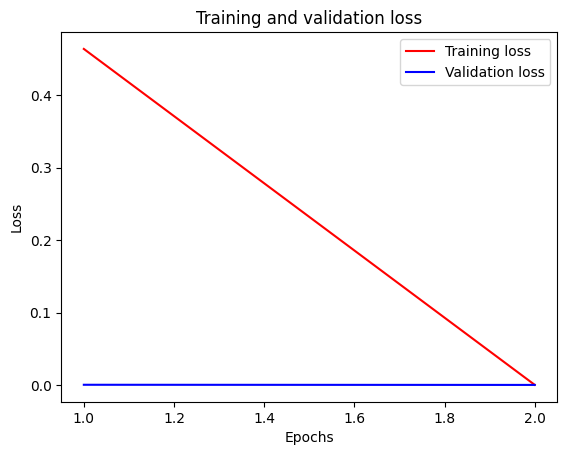

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [ ]:
emotion_Y_predicted = np.zeros(predict.shape)

for i in range (0,len(predict)):
    u = predict[i]
    v = np.argmax(u)
    emotion_Y_predicted[i][v] = 1

In [ ]:
correct_count = 0
total_count = 0

for j in range(0, predict.shape[0]):

    total_count += 1

    if np.array_equal(Y_test[j], emotion_Y_predicted[j]) == True:

        correct_count += 1

In [ ]:
print("Correct Count : ", correct_count)
print("\nTotal Count : ", total_count)

Correct Count :  1503

Total Count :  1503


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy Score : ", accuracy_score(Y_test, emotion_Y_predicted ))
print("F1 Score : ", f1_score(Y_test, emotion_Y_predicted, average='weighted' ))

Accuracy Score :  1.0
F1 Score :  1.0


In [ ]:
def preprocess(input):
    words = word_tokenize(input)
    stop_removed_words = []
    punc_removed_words = []
    lemmed_words = []

    for word in words:
        if word not in stop_words:
            stop_removed_words.append(word)

    table1 = str.maketrans('', '', string.punctuation)
    stripped = [v.translate(table1) for v in stop_removed_words]
    punc_removed_words = [word for word in stripped if word.isalpha()]

    for pun_word in punc_removed_words:
        lemmed_words.append(lem.lemmatize(pun_word))

    clean_text = ''
    for z in lemmed_words:
        clean_text += ' ' + z

    return clean_text

In [ ]:
final_obj = []
final_emotion = 'NILL'
def getInput(ud):

    final_obj.clear()

    for i in ud:
        final = preprocess(i)
        final_obj.append(final)

    new_tokenizer = Tokenizer(num_words=max_words, split=' ')
    new_tokenizer.fit_on_texts(final_obj)

    X_input = new_tokenizer.texts_to_sequences(final_obj)

    X_input = pad_sequences(X_input, maxlen=32)

    emotion_dataset_dummies = pd.get_dummies(data['Emotion'])
    emotion_dataset_Y = emotion_dataset_dummies.values

    predict = model.predict(X_input)

    print(predict)

    np.save("text_emotion.npy", predict)

    emotion_Y_predicted = np.zeros(predict.shape)

    for i in range (0,len(predict)):
        u = predict[i]
        v = np.argmax(u)
        emotion_Y_predicted[i][v] = 1

    final_emotion = dict_label.get(v)
    print(final_emotion)

In [ ]:
filename = 'extracted_text.txt'

with open(filename, 'r') as file:
    file_contents = file.read()

ud = []

ud.append(file_contents)
getInput(ud)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.04053969 0.08318337 0.1142207  0.11388609 0.44388852 0.02579246
  0.17848918]]
joy


In [ ]:
print("Input  : " , final_obj[0], "\nOutput : ", dict_label.get(np.argmax(emotion_Y_predicted[0])), "\n\n" )

Input  :   
Output :  joy 




In [ ]:
print("Classified Emotion: ", dict_label.get(np.argmax(emotion_Y_predicted[0])));

Classified Emotion:  joy
